# Dictionaries

This chapter presents a built-in type called a dictionary.
It is one of Python's best features -- and the building block of many efficient and elegant algorithms.

We'll use dictionaries to compute the number of unique words in a book and the number of times each one appears.
And in the exercises, we'll use dictionaries to solve word puzzles.

In [ ]:
import sys
from pathlib import Path

current = Path.cwd()
for parent in [current, *current.parents]:
    if (parent / '_config.yml').exists():
        project_root = parent  # ← Add project root, not chapters
        break
else:
    project_root = Path.cwd().parent.parent

sys.path.insert(0, str(project_root))

from shared import thinkpython, diagram, jupyturtle
from shared.download import download

# Register as top-level modules so direct imports work in subsequent cells
sys.modules['thinkpython'] = thinkpython
sys.modules['diagram'] = diagram
sys.modules['jupyturtle'] = jupyturtle


## Dictionary Fundamentals


### What Is a Dictionary?

- A **dictionary** is like a list, but more general.
- In a list, the indices have to be integers; in a dictionary they can be (almost) any type.
- A dictionary represents a **mapping** from keys to values, just like a real dictionary. 
- Each dictionary item consists of a **key** and a **value** separated by a **colon**. 
- Dictionary items are separated by **commas** and enclosed in **curly braces**.

A **list** of number words can be accessed using an integer as an index. A **dictionary**, as an example here, goes in the other direction, and loop up a word to get the corresponding integer. 

In [92]:
nums_lst = ['zero', 'one', 'two']
print(nums_lst)
print(nums_lst[1])

nums_dic = {'zero': 0, 'one': 1, 'two': 2}
print(nums_dic)
print(nums_dic['one'])

['zero', 'one', 'two']
one
{'zero': 0, 'one': 1, 'two': 2}
1


In mathematical language, a dictionary represents a **mapping** from keys to values, so you can also say that each key "maps to" a value.
In this example, each number word maps to the corresponding integer.

The following figure shows the state diagram for `numbers`.
A dictionary is represented by a box with the word "dict" outside and the items inside.
Each item is represented by a key and an arrow pointing to a value.
The quotation marks indicate that the keys here are strings, not variable names.

In [ ]:
from diagram import make_dict, Binding, Value

d1 = make_dict(numbers, dy=-0.3, offsetx=0.37)
binding1 = Binding(Value('numbers'), d1)

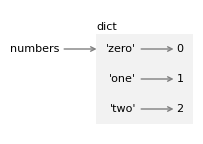

In [ ]:
from diagram import diagram, adjust, Bbox

width, height, x, y = [1.83, 1.24, 0.49, 0.85]
ax = diagram(width, height)
bbox = binding1.draw(ax, x, y)
# adjust(x, y, bbox)

### Creating Dictionaries

Python provides several ways to create a dictionary, depending on whether you already have the data or are building it incrementally. The most common approach is a **dict literal**, but the `dict()` constructor and comprehensions are useful when keys and values come from other sources.

Python offers several ways to create a dictionary:

| # | Method | Syntax | Notes |
|---|---|---|---|
| 1 | Empty dict literal | `{}` | Fastest way to create an empty dict |
| 2 | Dict literal | `{'a': 1, 'b': 2}` | Keys and values known up front |
| 3 | `dict()` constructor | `dict(a=1, b=2)` | Keys must be valid identifiers |
| 4 | From list of tuples | `dict([('a', 1), ('b', 2)])` | Useful when pairs are already in a sequence |
| 5 | `dict.fromkeys()` | `dict.fromkeys(['a', 'b'], 0)` | All keys share the same default value |
| 6 | Dict comprehension | `{k: v for k, v in items}` | Build from any iterable with an expression |

Pay attention to ways 2, 3, and 4. We usually focus on dict literal but we should know more.

In [ ]:
# 1. Empty dict literal
d1 = {}

# 2. Dict literal with items
d2 = {'zero': 0, 'one': 1, 'two': 2}

# 3. dict() constructor with keyword arguments (keys must be valid identifiers)
d3 = dict(zero=0, one=1, two=2)

# 4. dict() from a list of (key, value) tuples
d4 = dict([('zero', 0), ('one', 1), ('two', 2)])

# 5. dict.fromkeys() — all keys share the same default value
d5 = dict.fromkeys(['zero', 'one', 'two'], 0)

# 6. Dict comprehension
words = ['zero', 'one', 'two']
d6 = {word: idx for idx, word in enumerate(words)}

print("Empty literal:       ", d1)
print("Dict literal:        ", d2)
print("dict() keywords:     ", d3)
print("dict() from tuples:  ", d4)
print("dict.fromkeys():     ", d5)
print("Dict comprehension:  ", d6)

Empty literal:        {}
Dict literal:         {'zero': 0, 'one': 1, 'two': 2}
dict() keywords:      {'zero': 0, 'one': 1, 'two': 2}
dict() from tuples:   {'zero': 0, 'one': 1, 'two': 2}
dict.fromkeys():      {'zero': 0, 'one': 0, 'two': 0}
Dict comprehension:   {'zero': 0, 'one': 1, 'two': 2}


#### Dict Literal

One way to create a dictionary is to put the items inside curly braces. 

In [48]:
numbers = {'zero': 0, 'one': 1, 'two': 2}

Each item consists of a key and a value separated by a colon.
The items are separated by commas and enclosed in curly braces.

Another way to create a dictionary is to use the `dict` function.
We can make an empty dictionary like this.

In [49]:
empty = dict()
empty

And we can make a copy of a dictionary like this.

In [50]:
numbers_copy = dict(numbers)
numbers_copy

It is often useful to make a copy before performing operations that modify dictionaries.

### Accessing and Modifying Entries

Now the dictionary contains three items.

To look up a key and get the corresponding value, we use the bracket operator.


The curly braces, `{}`, represent an empty dictionary. To add items to the dictionary, we'll use **square brackets**.
This assignment adds to the dictionary an **item**, which represents the association of a **key** and a **value**.
In this example, the key is the string `'zero'` and the value is the integer `0`.
If we display the dictionary, we see that it contains one item, which contains a key and a value separated by a colon, `:`.

In [ ]:
numbers['zero'] = 0
numbers

{'zero': 0}

We can add more items like this.

In [ ]:
numbers['one'] = 1
numbers['two'] = 2
numbers

{'zero': 0, 'one': 1, 'two': 2}

In [43]:
numbers['two']

If the key isn't in the dictionary, we get a `KeyError`.

In [44]:
%%expect KeyError
numbers['three']


The `len` function works on dictionaries; it returns the number of items.

In [45]:
len(numbers)

## Working with Dictionary Data


### Dictionary Methods and Membership

The `in` operator works on dictionaries, too; it tells you whether something appears as a *key* in the dictionary.


In [51]:
'one' in numbers

The `in` operator does *not* check whether something appears as a value.

In [52]:
1 in numbers

To see whether something appears as a value in a dictionary, you can use the method `values`, which returns a sequence of values, and then use the `in` operator.

In [53]:
1 in numbers.values()

### Why Dictionary Lookup Is Fast

The items in a Python dictionary are stored in a **hash table**, which is a way of organizing data that has a remarkable property: the `in` operator takes about the same amount of time no matter how many items are in the dictionary.
That makes it possible to write some remarkably efficient algorithms.


In [ ]:
download('https://raw.githubusercontent.com/AllenDowney/ThinkPython/v3/words.txt');

To demonstrate, we'll compare two algorithms for finding pairs of words where one is the reverse of another -- like `stressed` and `desserts`.
We'll start by reading the word list.

In [55]:
word_list = open('words.txt').read().split()
len(word_list)

And here's `reverse_word` from the previous chapter.

In [56]:
def reverse_word(word):
    return ''.join(reversed(word))

The following function loops through the words in the list.
For each one, it reverses the letters and then checks whether the reversed word is in the word list.

In [57]:
def too_slow():
    count = 0
    for word in word_list:
        if reverse_word(word) in word_list:
            count += 1
    return count

This function takes more than a minute to run.
The problem is that the `in` operator checks the words in the list one at a time, starting at the beginning.
If it doesn't find what it's looking for -- which happens most of the time -- it has to search all the way to the end.

To measure how long a function takes, we can use `%time` which is one of Jupyter's "built-in magic commands".
These commands are not part of the Python language, so they might not work in other development environments.

In [58]:
# %time too_slow()

And the `in` operator is inside the loop, so it runs once for each word.
Since there are more than 100,000 words in the list, and for each one we check more than 100,000 words, the total number of comparisons is the number of words squared -- roughly -- which is almost 13 billion. 

In [59]:
len(word_list)**2

We can make this function much faster with a dictionary.
The following loop creates a dictionary that contains the words as keys.

In [60]:
word_dict = {}
for word in word_list:
    word_dict[word] = 1

The values in `word_dict` are all `1`, but they could be anything, because we won't ever look them up -- we will only use this dictionary to check whether a key exists.

Now here's a version of the previous function that replaces `word_list` with `word_dict`.

In [61]:
def much_faster():
    count = 0
    for word in word_dict:
        if reverse_word(word) in word_dict:
            count += 1
    return count

This function takes less than one hundredth of a second, so it's about 10,000 times faster than the previous version.

In general, the time it takes to find an element in a list is proportional to the length of the list.
The time it takes to find a key in a dictionary is almost constant -- regardless of the number of items.

In [62]:
%time much_faster()

### Counting with Dictionaries

Suppose you are given a string and you want to count how many times each letter appears.
A dictionary is a good tool for this job.
We'll start with an empty dictionary.


In [64]:
counter = {}

As we loop through the letters in the string, suppose we see the letter `'a'` for the first time.
We can add it to the dictionary like this.

In [65]:
counter['a'] = 1

The value `1` indicates that we have seen the letter once.
Later, if we see the same letter again, we can increment the counter like this.

In [66]:
counter['a'] += 1

Now the value associated with `'a'` is `2`, because we've seen the letter twice.

In [67]:
counter

The following function uses these features to count the number of times each letter appears in a string.

In [68]:
def value_counts(string):
    counter = {}
    for letter in string:
        if letter not in counter:
            counter[letter] = 1
        else:
            counter[letter] += 1
    return counter

Each time through the loop, if `letter` is not in the dictionary, we create a new item with key `letter` and value `1`.
If `letter` is already in the dictionary we increment the value associated with `letter`.

Here's an example.

In [69]:
counter = value_counts('brontosaurus')
counter

The items in `counter` show that the letter `'b'` appears once, `'r'` appears twice, and so on.

### Iterating Through Dictionaries

If you use a dictionary in a `for` statement, it traverses the keys of the dictionary.
To demonstrate, let's make a dictionary that counts the letters in `'banana'`.


In [70]:
counter = value_counts('banana')
counter

The following loop prints the keys, which are the letters.

In [71]:
for key in counter:
    print(key)

To print the values, we can use the `values` method.

In [72]:
for value in counter.values():
    print(value)

To print the keys and values, we can loop through the keys and look up the corresponding values.

In [73]:
for key in counter:
    value = counter[key]
    print(key, value)

In the next chapter, we'll see a more concise way to do the same thing.

## Dictionary Transformations


### Dictionary Comprehensions

Dictionary comprehensions provide a concise way to build dictionaries from existing data.
The pattern is similar to a list comprehension, but each result contains a key and a value.


In [ ]:
# Dictionary comprehensions
# Basic syntax: {key_expr: value_expr for item in iterable}

# Create a dictionary of squares
square_dict = {x: x**2 for x in range(5)}
print("Square dict:", square_dict)

# From two lists
keys = ['a', 'b', 'c', 'd']
values = [1, 2, 3, 4]
combined_dict = {k: v for k, v in zip(keys, values)}
print("Combined dict:", combined_dict)

# Filter and transform
prices = {'apple': 0.50, 'banana': 0.30, 'orange': 0.80, 'grape': 1.20}
expensive_fruits = {fruit: price for fruit, price in prices.items() if price > 0.50}
print("Expensive fruits:", expensive_fruits)

### Inverting a Dictionary

Sometimes you want to look up a value and get the corresponding key.
For example, if you have a word counter that maps each word to its count, you might want a dictionary that maps a count to the words that appear that many times.

The challenge is that dictionary keys must be unique, but values don't have to be.
One way to invert a dictionary is to create a new dictionary where each value maps to a list of keys from the original.
As an example, let's count the letters in `parrot`.


In [ ]:
d = value_counts('parrot')
d


{'p': 1, 'a': 1, 'r': 2, 'o': 1, 't': 1}

If we invert this dictionary, the result should be `{1: ['p', 'a', 'o', 't'], 2: ['r']}`.
That means the letters that appear once are `'p'`, `'a'`, `'o'`, and `'t'`, and the letter that appears twice is `'r'`.

The following function takes a dictionary and returns its inverse as a new dictionary.

In [ ]:
def invert_dict(d):
    new = {}
    for key, value in d.items():
        if value not in new:
            new[value] = [key]
        else:
            new[value].append(key)
    return new


The `for` loop walks through the keys and values in `d`.
If the value is not already in the new dictionary, we create a list with one key.
Otherwise we append the key to the existing list.

We can test it like this:


In [ ]:
invert_dict(d)

{1: ['p', 'a', 'o', 't'], 2: ['r']}

In [ ]:
### Exercise: Inverting a Dictionary
#   Given the dictionary below that maps student names to grades,
#   use invert_dict() to find all students who received each grade.
#   Print the inverted dictionary.
grades = {'Alice': 'A', 'Bob': 'B', 'Carol': 'A', 'Dave': 'C', 'Eve': 'B'}
### Your code starts here.




### Your code ends here.

In [ ]:
grades = {'Alice': 'A', 'Bob': 'B', 'Carol': 'A', 'Dave': 'C', 'Eve': 'B'}
print(invert_dict(grades))
# {'A': ['Alice', 'Carol'], 'B': ['Bob', 'Eve'], 'C': ['Dave']}

And we get the result we expected.

This is the first example we've seen where the values in a dictionary are lists.
We will see more!

### Sorting Dictionaries

Sometimes you want to sort dictionary items by their values rather than their keys.
We can define a small helper that returns the second element of a `(key, value)` pair.


In [ ]:
def second_element(t):
    return t[1]

Then we pass that function as the optional `key` argument to `sorted`.
The `key` function computes a **sort key** for each item.

In [ ]:
counter = value_counts('parrot')
items = counter.items()
sorted_items = sorted(items, key=second_element)
sorted_items


[('b', 1), ('n', 2), ('a', 3)]

The sort key determines the order.
The letter with the lowest count appears first, and the highest count appears last.
So we can find the most common letter like this:

In [ ]:
sorted_items[-1]

('a', 3)

If we only want the maximum, we don't have to sort the list.
We can use `max`, which also accepts a `key` function.

In [ ]:
max(items, key=second_element)

('a', 3)

In [ ]:
### Exercise: Sorting by Value
#   1. Count the letter frequencies in the word 'mississippi'.
#   2. Sort the resulting items by frequency (value), ascending.
#   3. Print the letter with the highest frequency using max() with a key function.
### Your code starts here.




### Your code ends here.

In [ ]:
counter = value_counts('mississippi')
items = counter.items()

def second_element(t):
    return t[1]

print(sorted(items, key=second_element))   # sorted by frequency ascending
print(max(items, key=second_element))      # ('i', 4) most frequent letter


[('m', 1), ('p', 2), ('i', 4), ('s', 4)]
('i', 4)
42
-2041887039836605225
529344067295497451


## Common Dictionary Patterns


### Accumulating Results from Dictionary Data

For many programming tasks, it is useful to loop through one list or dictionary while building another.
As an example, we'll loop through the words in `word_dict` and make a list of palindromes -- that is, words that are spelled the same backward and forward, like "noon" and "rotator".

In the previous chapter, one of the exercises asked you to write a function that checks whether a word is a palindrome.
Here's a solution that uses `reverse_word`.


In [41]:
def is_palindrome(word):
    """Check if a word is a palindrome."""
    return reverse_word(word) == word

If we loop through the words in `word_dict`, we can count the number of palindromes like this.

In [42]:
count = 0

for word in word_dict:
    if is_palindrome(word):
        count +=1
        
count

By now, this pattern is familiar.

* Before the loop, `count` is initialized to `0`.

* Inside the loop, if `word` is a palindrome, we increment `count`.

* When the loop ends, `count` contains the total number of palindromes.

We can use a similar pattern to make a list of palindromes.

In [43]:
palindromes = []

for word in word_dict:
    if is_palindrome(word):
        palindromes.append(word)

palindromes[:10]

Here's how it works:

* Before the loop, `palindromes` is initialized with an empty list.

* Inside the loop, if `word` is a palindrome, we append it to the end of `palindromes`.

* When the loop ends, `palindromes` is a list of palindromes.

In this loop, `palindromes` is used as an **accumulator**, which is a variable that collects or accumulates data during a computation.

Now suppose we want to select only palindromes with seven or more letters.
We can loop through `palindromes` and make a new list that contains only long palindromes.

In [44]:
long_palindromes = []

for word in palindromes:
    if len(word) >= 7:
        long_palindromes.append(word)
        
long_palindromes

Looping through a list like this, selecting some elements and omitting others, is called **filtering**.

### Dictionaries as Memory

If you ran the `fibonacci` function from [Chapter 6](section_fibonacci), maybe you noticed that the bigger the argument you provide, the longer the function takes to run.


In [45]:
def fibonacci(n):
    if n == 0:
        return 0
    
    if n == 1:
        return 1

    return fibonacci(n-1) + fibonacci(n-2)

Furthermore, the run time increases quickly.
To understand why, consider the following figure, which shows the **call graph** for
`fibonacci` with `n=4`:

In [46]:
from diagram import make_binding, Frame, Arrow

bindings = [make_binding('n', i) for i in range(5)]
frames = [Frame([binding]) for binding in bindings]

In [47]:
arrowprops = dict(arrowstyle="-", color='gray', alpha=0.5, ls='-', lw=0.5)

def left_arrow(ax, bbox1, bbox2):
    x = bbox1.xmin + 0.1
    y = bbox1.ymin
    dx = bbox2.xmax - x - 0.1
    dy = bbox2.ymax - y
    arrow = Arrow(dx=dx, dy=dy, arrowprops=arrowprops)
    return arrow.draw(ax, x, y)

def right_arrow(ax, bbox1, bbox2):
    x = bbox1.xmax - 0.1
    y = bbox1.ymin
    dx = bbox2.xmin - x + 0.1
    dy = bbox2.ymax - y
    arrow = Arrow(dx=dx, dy=dy, arrowprops=arrowprops)
    return arrow.draw(ax, x, y)

In [48]:
from diagram import diagram, adjust, Bbox

width, height, x, y = [4.94, 2.16, -1.03, 1.91]
ax = diagram(width, height)

dx = 0.6
dy = 0.55

bboxes = []
bboxes.append(frames[4].draw(ax, x+6*dx, y))

bboxes.append(frames[3].draw(ax, x+4*dx, y-dy))
bboxes.append(frames[2].draw(ax, x+8*dx, y-dy))

bboxes.append(frames[2].draw(ax, x+3*dx, y-2*dy))
bboxes.append(frames[1].draw(ax, x+5*dx, y-2*dy))
bboxes.append(frames[1].draw(ax, x+7*dx, y-2*dy))
bboxes.append(frames[0].draw(ax, x+9*dx, y-2*dy))

bboxes.append(frames[1].draw(ax, x+2*dx, y-3*dy))
bboxes.append(frames[0].draw(ax, x+4*dx, y-3*dy))

left_arrow(ax, bboxes[0], bboxes[1])
left_arrow(ax, bboxes[1], bboxes[3])
left_arrow(ax, bboxes[3], bboxes[7])
left_arrow(ax, bboxes[2], bboxes[5])

right_arrow(ax, bboxes[0], bboxes[2])
right_arrow(ax, bboxes[1], bboxes[4])
right_arrow(ax, bboxes[2], bboxes[6])
right_arrow(ax, bboxes[3], bboxes[8])

bbox = Bbox.union(bboxes)
# adjust(x, y, bbox)

A call graph shows a set of function frames, with lines connecting each frame to the frames of the functions it calls.
At the top of the graph, `fibonacci` with `n=4` calls `fibonacci` with ` n=3` and `n=2`.
In turn, `fibonacci` with `n=3` calls `fibonacci` with `n=2` and `n=1`. And so on.

Count how many times `fibonacci(0)` and `fibonacci(1)` are called. 
This is an inefficient solution to the problem, and it gets worse as the argument gets bigger.

One solution is to keep track of values that have already been computed by storing them in a dictionary.
A previously computed value that is stored for later use is called a **memo**.
Here is a "memoized" version of `fibonacci`:

In [49]:
known = {0:0, 1:1}

def fibonacci_memo(n):
    if n in known:
        return known[n]

    res = fibonacci_memo(n-1) + fibonacci_memo(n-2)
    known[n] = res
    return res

`known` is a dictionary that keeps track of the Fibonacci numbers we already know
It starts with two items: `0` maps to `0` and `1` maps to `1`.

Whenever `fibonacci_memo` is called, it checks `known`.
If the result is already there, it can return immediately.
Otherwise it has to compute the new value, add it to the dictionary, and return it.

Comparing the two functions, `fibonacci(40)` takes about 30 seconds to run.
`fibonacci_memo(40)` takes about 30 microseconds, so it's a million times faster.
In the notebook for this chapter, you'll see where these measurements come from.

In [50]:
# %time fibonacci(40)

In [51]:
%time fibonacci_memo(40)

## Hashable Keys and Best Practices


### Lists as Values and Hashable Keys

You can put a list in a dictionary as a value.
For example, here's a dictionary that maps from the number `4` to a list of four letters.


In [74]:
d = {4: ['r', 'o', 'u', 's']}
d

But you can't put a list in a dictionary as a key.
Here's what happens if we try.

In [76]:
%%expect TypeError
letters = list('abcd')
d[letters] = 4

I mentioned earlier that dictionaries use hash tables, and that means that the keys have to be **hashable**.

A **hash** is a function that takes a value (of any kind) and returns an integer.
Dictionaries use these integers, called hash values, to store and look up keys.

This system only works if a key is immutable, so its hash value is always the same.
But if a key is mutable, its hash value could change, and the dictionary would not work.
That's why keys have to be hashable, and why mutable types like lists aren't.

Since dictionaries are mutable, they can't be used as keys, either.
But they *can* be used as values.

### Tuple Keys

An object is hashable if its hash value stays the same during its lifetime. An `id()` is the memory address of the object -- unique per object, but can be reused after an object is deleted.
`hash()` is a number derived from the object's contents or value, used for fast lookups.
Hashable objects can be used as dictionary keys and stored in sets.
A key rule is: if `a == b`, then `hash(a) == hash(b)`.

**Hashability caveat:** a tuple is hashable only if all of its elements are hashable.
If a tuple contains a list (or another unhashable type), it cannot be used as a dictionary key.


A hash value is just an integer that represents an object, computed by the `hash()` function. 

| Type(s) | Mutability/Conditional | Hashable | Example |
|---|---|---|---|
| `int`, `float`, `bool`, `complex` | Immutable | Yes | `42`, `3.14`, `True`, `2+3j` |
| `str` | Immutable | Yes | `"hello"` |
| `tuple` | Immutable, conditional on all elements being hashable | Yes (conditional) | `(1, "a")` yes, `([1], "a")` no |
| `frozenset` | Immutable, conditional on all elements being hashable | Yes (conditional) | `frozenset({1, 2})` |
| `bytes` | Immutable | Yes | `b"abc"` |
| `None` | Immutable singleton | Yes | `None` |
| Functions, classes | Identity-based objects | Yes (by identity) | `len`, `dict` |
| `list` | Mutable | No | `[1, 2, 3]` |
| `dict` | Mutable | No | `{"a": 1}` |
| `set` | Mutable | No | `{1, 2, 3}` |
| `bytearray` | Mutable | No | `bytearray(b"abc")` |


Here are a few quick checks. Equal tuples have equal hashes, and tuples of hashable elements are hashable.

In [ ]:
a = (1, 2)
b = (1, 2)
a == b, hash(a) == hash(b)      ### return True, True

hash((1, (2, 3)))               ###  hashes a nested tuple, returning the large number shown

7267574591690527098

In [ ]:
%%expect TypeError

mixed = (1, [2, 3])
d = {mixed: 'not hashable'}

TypeError: unhashable type: 'list'

In [ ]:
### Exercise: Hashable Tuples
#   1. Create a dictionary that uses tuples as keys to map (row, col) grid positions
#      to string values: (0,0)->'start', (1,2)->'middle', (2,2)->'end'.
#   2. Print the value at position (1, 2).
#   3. Try to use ([0, 0],) as a key — wrap it in a try/except and print the error type.
### Your code starts here.




### Your code ends here.

In [ ]:
grid = {(0,0): 'start', (1,2): 'middle', (2,2): 'end'}
print(grid[(1, 2)])    # 'middle'

try:
    bad = {([0, 0],): 'unhashable'}
except TypeError as e:
    print(type(e).__name__, e)